In [1]:
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.pyplot as plt
import cv2

In [2]:
a_source = cv2.imread('images/a_low_pass_source.png', cv2.IMREAD_GRAYSCALE)

a_fft = np.fft.fft2(a_source)
a_fft_shift = np.fft.fftshift(a_fft)
a_fft_spectrum = np.log(np.abs(a_fft_shift))

In [3]:
a_mask = cv2.circle(np.zeros(a_fft_shift.shape), tuple(i//2 for i in a_fft_shift.shape), 50, 1, thickness=-1)
a_fft_m = np.multiply(a_fft_shift, a_mask)
a_fft_m_spectrum = np.log(np.abs(1+a_fft_m))

a_result = np.fft.fft2(a_fft_m)
a_result_spectrum = np.abs(a_result)

In [4]:
FFT_MAX = np.max(a_fft_spectrum)
FFT_MIN = np.min(a_fft_spectrum)

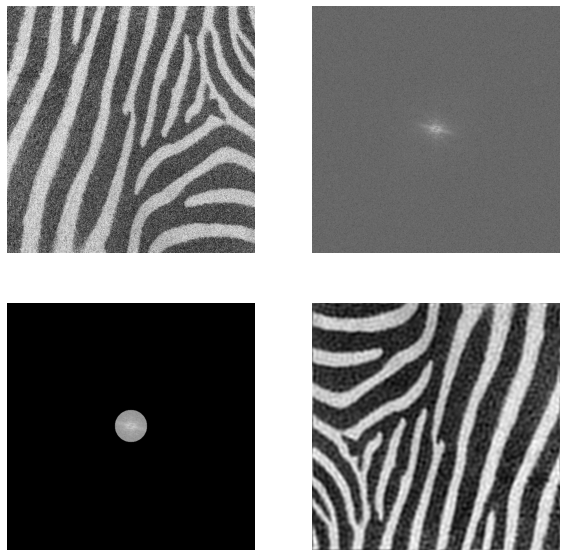

In [5]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 2, 1)
plt.axis("off")
plt.imshow(a_source, cmap="gray", vmin=0, vmax=255)

fig.add_subplot(2, 2, 2)
plt.axis("off")
plt.imshow(a_fft_spectrum, cmap="gray", vmin=FFT_MIN, vmax=FFT_MAX)

fig.add_subplot(2, 2, 3)
plt.axis("off")
plt.imshow(a_fft_m_spectrum, cmap="gray")

fig.add_subplot(2, 2, 4)
plt.axis("off")
plt.imshow(a_result_spectrum, cmap="gray")

plt.show()

In [6]:
b_source = cv2.imread('images/b_high_pass_source.png', cv2.IMREAD_GRAYSCALE)

b_fft = np.fft.fft2(b_source)
b_fft_shift = np.fft.fftshift(b_fft)
b_fft_spectrum = np.log(np.abs(b_fft_shift))

In [7]:
b_mask = cv2.circle(np.ones(b_fft_shift.shape), tuple(i//2 for i in b_fft_shift.shape), 50, 0, thickness=-1)
b_fft_m = np.multiply(b_fft_shift, b_mask)
b_fft_m_spectrum = np.log(np.abs(1+b_fft_m))

b_result = np.fft.fft2(b_fft_m)
b_result_spectrum = np.abs(b_result)

In [8]:
FFT_MAX = np.max(b_fft_spectrum)
FFT_MIN = np.min(b_fft_spectrum)

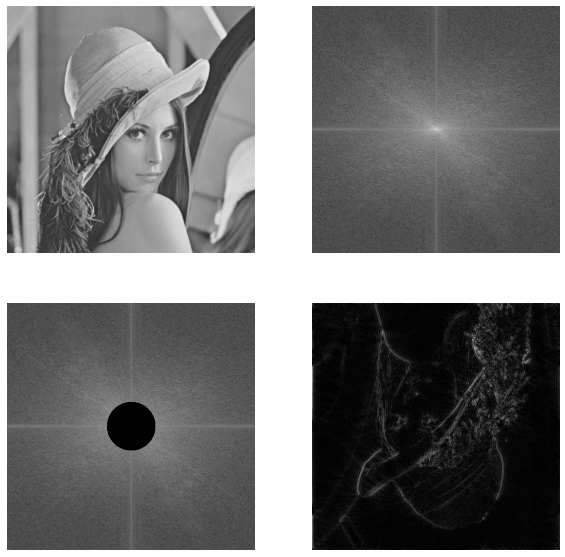

In [9]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 2, 1)
plt.axis("off")
plt.imshow(b_source, cmap="gray", vmin=0, vmax=255)

fig.add_subplot(2, 2, 2)
plt.axis("off")
plt.imshow(b_fft_spectrum, cmap="gray", vmin=FFT_MIN, vmax=FFT_MAX)

fig.add_subplot(2, 2, 3)
plt.axis("off")
plt.imshow(b_fft_m_spectrum, cmap="gray", vmin=FFT_MIN, vmax=FFT_MAX)

fig.add_subplot(2, 2, 4)
plt.axis("off")
plt.imshow(b_result_spectrum, cmap="gray")

plt.show()

In [10]:
c_source = cv2.imread('images/c_sample_image.png', cv2.IMREAD_GRAYSCALE)
c_pattern = cv2.imread('images/c_pattern_source.png', cv2.IMREAD_GRAYSCALE)
c_sample = cv2.imread('images/c_antipattern.png', cv2.IMREAD_GRAYSCALE)

c_fft = np.fft.fft2(c_source)
c_fft_shift = np.fft.fftshift(c_fft)
c_fft_spectrum = np.log(np.abs(c_fft_shift))

c_pattern_fft = np.fft.fft2(c_pattern)
c_pattern_fft_shift = np.fft.fftshift(c_pattern_fft)
c_pattern_fft_spectrum = np.log(np.abs(c_pattern_fft_shift))

c_sample_fft = np.fft.fft2(c_sample)
c_sample_fft_shift = np.fft.fftshift(c_sample_fft)
c_sample_fft_spectrum = np.log(np.abs(c_sample_fft_shift))

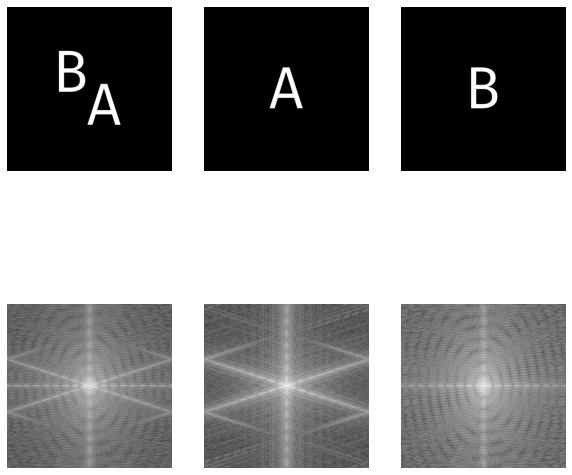

In [18]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 3, 1)
plt.axis("off")
plt.imshow(c_source, cmap="gray")

fig.add_subplot(2, 3, 2)
plt.axis("off")
plt.imshow(c_pattern, cmap="gray")

fig.add_subplot(2, 3, 3)
plt.axis("off")
plt.imshow(c_sample, cmap="gray")

fig.add_subplot(2, 3, 4)
plt.axis("off")
plt.imshow(c_fft_spectrum, cmap="gray")

fig.add_subplot(2, 3, 5)
plt.axis("off")
plt.imshow(c_pattern_fft_spectrum, cmap="gray")

fig.add_subplot(2, 3, 6)
plt.axis("off")
plt.imshow(c_sample_fft_spectrum, cmap="gray")

plt.show()

In [20]:
d_source = cv2.imread('images/d_graphene.png', cv2.IMREAD_GRAYSCALE)

d_fft = np.fft.fft2(d_source)
d_fft_shift = np.fft.fftshift(d_fft)
d_fft_spectrum = np.log(np.abs(d_fft_shift))

In [67]:
d_conj_fft = np.conjugate(d_fft)

d_result_fft = np.multiply(d_fft, d_conj_fft)
d_result_fft_shift = np.fft.fftshift(d_result_fft)
d_result_fft_spectrum = np.log(np.abs(d_result_fft_shift))

d_result_fft_spectrum_filtered = d_result_fft_spectrum.copy()
d_result_fft_spectrum_filtered[d_result_fft_spectrum_filtered < 25] = 0

d_result = np.fft.ifft2(d_result_fft)
d_result_spectrum = np.log(np.abs(d_result))

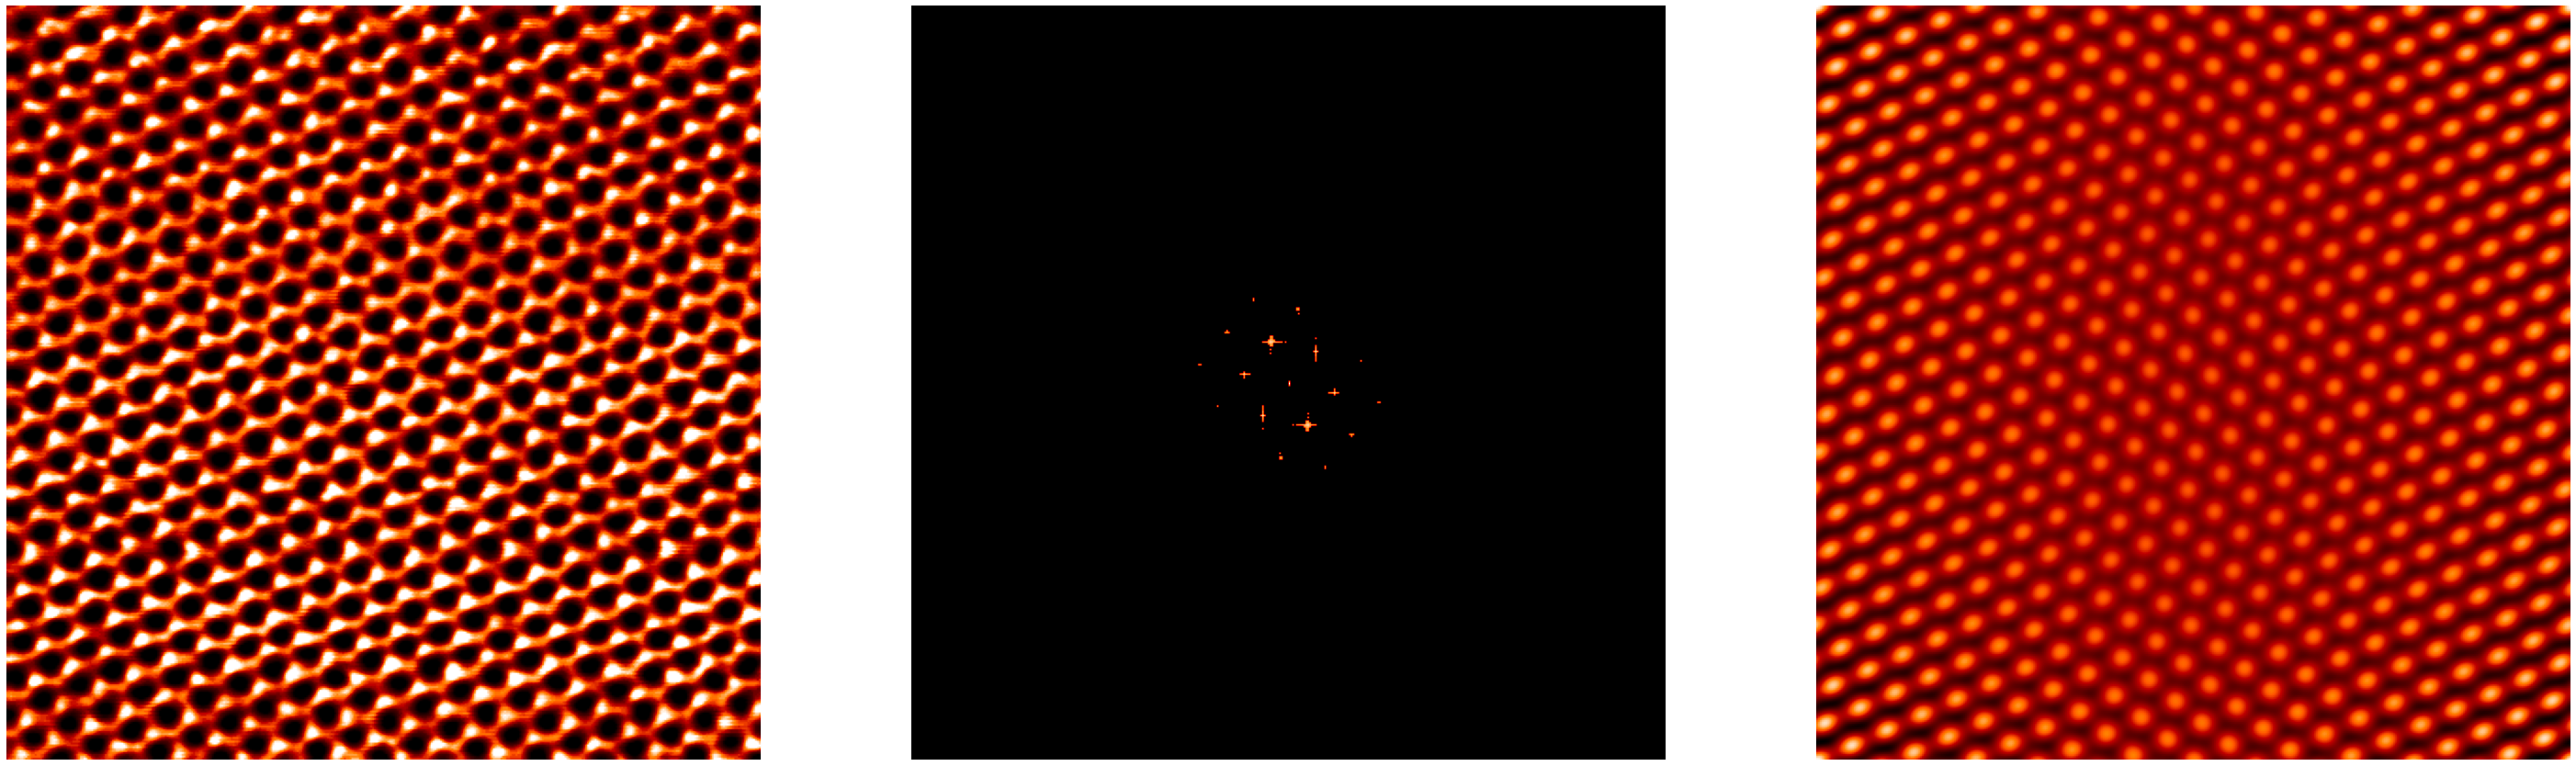

In [76]:
fig = plt.figure(figsize=(50, 50))

fig.add_subplot(1, 3, 1)
plt.axis("off")
plt.imshow(d_source, cmap="gist_heat")

fig.add_subplot(1, 3 ,2)
plt.axis("off")
plt.imshow(d_result_fft_spectrum_filtered, cmap="gist_heat")


fig.add_subplot(1, 3, 3)
plt.axis("off")
plt.imshow(d_result_spectrum, cmap="gist_heat")

plt.show()